In [ ]:
###

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle



from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [6]:
df = pd.read_pickle('df_res.pkl')
df_test = pd.read_pickle('df_test.pkl')

In [8]:
print(df.shape)
df.head()


(4564, 23)


,account length,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,...,eve_perc,total_calls,area code_408,area code_415,area code_510,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes,churn
0,-1.002286,-0.595943,0.174162,0.231080,-0.924691,0.808824,0.252466,0.300071,-0.012828,-1.016415,...,-0.924331,0.699851,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
1,0.109213,-0.595943,-1.339363,-1.453904,0.763894,-0.869923,-1.049873,0.707709,-1.771274,-0.209338,...,1.879406,-0.966984,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1
2,0.513395,-0.595943,-0.214768,-0.314062,-2.094012,1.063179,0.808343,0.758663,1.135545,-1.419953,...,-2.127580,0.758336,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1
3,-0.193923,1.007196,2.326119,1.123130,-0.219975,-0.869923,0.788490,0.351026,0.525472,-1.016415,...,-1.161896,0.290453,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0
4,-1.608558,-0.595943,1.109796,0.974455,1.183600,-0.615567,0.129379,-0.617114,-0.479355,-0.209338,...,0.324424,-0.148188,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1


In [13]:
df.columns.values

array(['account length', 'number vmail messages', 'total day minutes',
       'total day calls', 'total eve minutes', 'total eve calls',
       'total night minutes', 'total night calls', 'total intl minutes',
       'total intl calls', 'customer service calls', 'total_minutes',
       'night_perc', 'eve_perc', 'total_calls', 'area code_408',
       'area code_415', 'area code_510', 'international plan_no',
       'international plan_yes', 'voice mail plan_no',
       'voice mail plan_yes', 'churn'], dtype=object)

In [20]:
X_train = df[['account length', 'number vmail messages', 'total day minutes',
       'total day calls', 'total eve minutes', 'total eve calls',
       'total night minutes', 'total night calls', 'total intl minutes',
       'total intl calls', 'customer service calls', 'total_minutes',
       'night_perc', 'eve_perc', 'total_calls', 'area code_408',
       'area code_415', 'area code_510', 'international plan_no',
       'international plan_yes', 'voice mail plan_no',
       'voice mail plan_yes']]
y_train = df['churn']

X_test = df_test[['account length', 'number vmail messages', 'total day minutes',
       'total day calls', 'total eve minutes', 'total eve calls',
       'total night minutes', 'total night calls', 'total intl minutes',
       'total intl calls', 'customer service calls', 'total_minutes',
       'night_perc', 'eve_perc', 'total_calls', 'area code_408',
       'area code_415', 'area code_510', 'international plan_no',
       'international plan_yes', 'voice mail plan_no',
       'voice mail plan_yes']]
y_test = df_test['churn']

In [21]:
X_test.shape

(131, 22)

In [44]:
model = Sequential()


model.add(Dense(23,activation = 'relu'))
model.add(Dense(11,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',optimizer = 'adam')


In [45]:
model.fit(x=X_train,y=y_train,epochs =500,validation_data = (X_test,y_test))

Epoch 1/500
143/143 [==============================] - 0s 751us/step - loss: 0.6729 - val_loss: 0.6324
Epoch 2/500
143/143 [==============================] - 0s 421us/step - loss: 0.4937 - val_loss: 0.6215
Epoch 3/500
143/143 [==============================] - 0s 402us/step - loss: 0.4063 - val_loss: 0.6676
Epoch 4/500
143/143 [==============================] - 0s 403us/step - loss: 0.3632 - val_loss: 0.6753
Epoch 5/500
143/143 [==============================] - 0s 396us/step - loss: 0.3419 - val_loss: 0.7318
Epoch 6/500
143/143 [==============================] - 0s 407us/step - loss: 0.3130 - val_loss: 0.7555
Epoch 7/500
143/143 [==============================] - 0s 402us/step - loss: 0.2961 - val_loss: 0.7435
Epoch 8/500
143/143 [==============================] - 0s 397us/step - loss: 0.3084 - val_loss: 0.7545
Epoch 9/500
143/143 [==============================] - 0s 409us/step - loss: 0.2913 - val_loss: 0.7805
Epoch 10/500
143/143 [==============================] - 0s 392us/step - l

<AxesSubplot:>

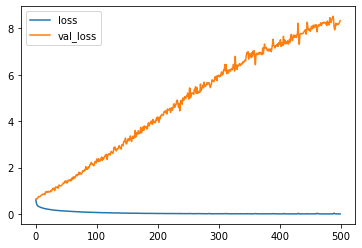

In [46]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [47]:
model = Sequential()


model.add(Dense(23,activation = 'relu'))
model.add(Dense(11,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',optimizer = 'adam')


In [48]:
from tensorflow.keras.callbacks import EarlyStopping

In [49]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min',verbose = 1,patience = 5)

In [50]:
model.fit(x=X_train,y=y_train,epochs =500,validation_data = (X_test,y_test),callbacks = [early_stop])

Epoch 1/500
143/143 [==============================] - 0s 727us/step - loss: 0.6384 - val_loss: 0.6529
Epoch 2/500
143/143 [==============================] - 0s 427us/step - loss: 0.4916 - val_loss: 0.6492
Epoch 3/500
143/143 [==============================] - 0s 408us/step - loss: 0.3949 - val_loss: 0.6992
Epoch 4/500
143/143 [==============================] - 0s 404us/step - loss: 0.3414 - val_loss: 0.7168
Epoch 5/500
143/143 [==============================] - 0s 407us/step - loss: 0.3146 - val_loss: 0.7205
Epoch 6/500
143/143 [==============================] - 0s 402us/step - loss: 0.2958 - val_loss: 0.7398
Epoch 7/500
143/143 [==============================] - 0s 405us/step - loss: 0.2946 - val_loss: 0.7680
Epoch 00007: early stopping


<AxesSubplot:>

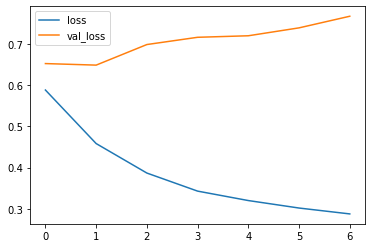

In [51]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [52]:
from tensorflow.keras.layers import Dropout

In [53]:
model = Sequential()


model.add(Dense(23,activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(11,activation = 'relu'))
model.add(Dropout(0.4))


model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',optimizer = 'adam')


In [54]:
model.fit(x=X_train,y=y_train,epochs =500,validation_data = (X_test,y_test),callbacks = [early_stop])

Epoch 1/500
143/143 [==============================] - 0s 766us/step - loss: 0.7122 - val_loss: 0.6673
Epoch 2/500
143/143 [==============================] - 0s 445us/step - loss: 0.6478 - val_loss: 0.6371
Epoch 3/500
143/143 [==============================] - 0s 428us/step - loss: 0.6024 - val_loss: 0.6116
Epoch 4/500
143/143 [==============================] - 0s 427us/step - loss: 0.5637 - val_loss: 0.6054
Epoch 5/500
143/143 [==============================] - 0s 427us/step - loss: 0.5486 - val_loss: 0.5968
Epoch 6/500
143/143 [==============================] - 0s 422us/step - loss: 0.5498 - val_loss: 0.6419
Epoch 7/500
143/143 [==============================] - 0s 425us/step - loss: 0.5403 - val_loss: 0.6242
Epoch 8/500
143/143 [==============================] - 0s 422us/step - loss: 0.5087 - val_loss: 0.6404
Epoch 9/500
143/143 [==============================] - 0s 417us/step - loss: 0.5152 - val_loss: 0.6125
Epoch 10/500
143/143 [==============================] - 0s 421us/step - l

<AxesSubplot:>

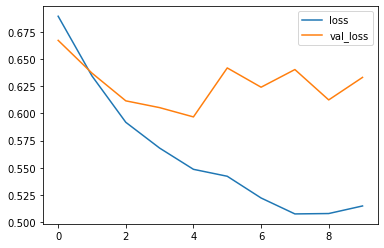

In [55]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [62]:
model = Sequential()


model.add(Dense(23,activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(11,activation = 'relu'))
model.add(Dropout(0.4))


model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',optimizer = 'adam')


In [63]:
model.fit(x=X_train,y=y_train,epochs =500,validation_data = (X_test,y_test),callbacks = [early_stop])

Epoch 1/500
143/143 [==============================] - 0s 766us/step - loss: 0.6977 - val_loss: 0.6749
Epoch 2/500
143/143 [==============================] - 0s 449us/step - loss: 0.6506 - val_loss: 0.6344
Epoch 3/500
143/143 [==============================] - 0s 423us/step - loss: 0.6210 - val_loss: 0.6154
Epoch 4/500
143/143 [==============================] - 0s 432us/step - loss: 0.5905 - val_loss: 0.6433
Epoch 5/500
143/143 [==============================] - 0s 424us/step - loss: 0.5575 - val_loss: 0.6306
Epoch 6/500
143/143 [==============================] - 0s 433us/step - loss: 0.5540 - val_loss: 0.6213
Epoch 7/500
143/143 [==============================] - 0s 441us/step - loss: 0.5308 - val_loss: 0.6316
Epoch 8/500
143/143 [==============================] - 0s 436us/step - loss: 0.5233 - val_loss: 0.6336
Epoch 00008: early stopping


<AxesSubplot:>

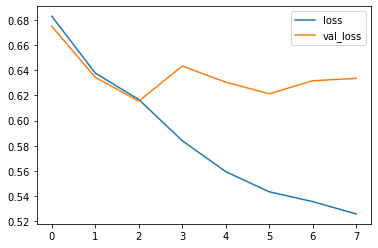

In [64]:
losses = pd.DataFrame(model.history.history)
losses.plot()